In [22]:
import pandas
# load the dataset
dataset = pandas.read_csv('papers.csv')
dataset.head()

,id,year,title,abstract
0,1,1987,Self-Organization of Associative Database and ...,Self-Organization of Associative Database and ...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,A Mean Field Theory of Layer IV of Visual Cort...
2,100,2019,Modeling of free swelling index based on varia...,Modeling of free swelling index based on varia...
3,1000,1987,Pairwise Conditional Random Forests for Facial...,Facial expression can be seen as the dynamic v...


In [23]:
import sys
print(sys.path)

['C:\\Users\\vieta\\NLP', 'C:\\Users\\vieta\\Miniconda3\\python37.zip', 'C:\\Users\\vieta\\Miniconda3\\DLLs', 'C:\\Users\\vieta\\Miniconda3\\lib', 'C:\\Users\\vieta\\Miniconda3', '', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\win32', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\vieta\\Miniconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\vieta\\.ipython']


In [24]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['abstract','word_count']].head()

,abstract,word_count
0,Self-Organization of Associative Database and ...,80
1,A Mean Field Theory of Layer IV of Visual Cort...,108
2,Modeling of free swelling index based on varia...,244
3,Facial expression can be seen as the dynamic v...,164


In [25]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count      4.000000
mean     149.000000
std       72.323348
min       80.000000
25%      101.000000
50%      136.000000
75%      184.000000
max      244.000000
Name: word_count, dtype: float64

In [26]:
#Identify common words
freq = pandas.Series(' '.join(dataset['abstract']).split()).value_counts()[:20]
freq

of            32
the           23
to            20
and           16
a             13
is             7
on             7
that           7
this           7
as             6
can            6
in             6
an             6
are            6
expression     5
for            5
Random         5
be             4
Forests        4
has            4
dtype: int64

In [27]:
#Identify uncommon words
unFreq =  pandas.Series(' '.join(dataset 
         ['abstract']).split()).value_counts()[-20:]
unFreq

well              1
complexity        1
Modeling          1
field             1
determination     1
result,           1
associate         1
moisture          1
aim               1
whose             1
consider          1
spatiotemporal    1
0.5).             1
This              1
sulfur            1
modeling,         1
trees             1
point             1
discussion,       1
types             1
dtype: int64

In [28]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "inversely"

print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [29]:
#Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [30]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [31]:
corpus = []
for i in range(len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [32]:
#View corpus item
corpus[2]

'modeling free swelling index based variable importance measurement parent coal property random forest method coke quality critical role steelmaking industry aim study examine complex relationship various conventional coal analysis coke making index free swelling index fsi random forest rf associated variable importance measurement vim powerful statistical data mining approach utilized study analyze high dimensional database sample rank variable develop accurate fsi predictive model based important variable vim performed various type analysis indicated volatile matter carbon moisture coal rank parameter organic sulfur effective coal prop erties prediction fsi variable used input set rf model fsi modeling prediction result fsi model indicated rf provide satisfactory prediction fsi correlation determination r mean square error laboratory fsis smaller interval unit fsi based rf used rank select effective variable evaluating nonlinear relationship among parameter moreover employed non para

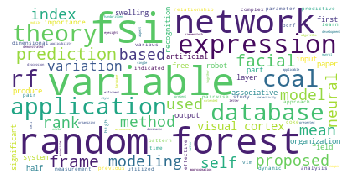

In [33]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [35]:
list(cv.vocabulary_.keys())[:10]

['self',
 'organization',
 'associative',
 'database',
 'application',
 'efficient',
 'method',
 'organizing',
 'proposed',
 'together']

[Text(0, 0, 'variable'),
 Text(0, 0, 'forest'),
 Text(0, 0, 'fsi'),
 Text(0, 0, 'random'),
 Text(0, 0, 'network'),
 Text(0, 0, 'expression'),
 Text(0, 0, 'database'),
 Text(0, 0, 'application'),
 Text(0, 0, 'theory'),
 Text(0, 0, 'coal'),
 Text(0, 0, 'rf'),
 Text(0, 0, 'prediction'),
 Text(0, 0, 'facial'),
 Text(0, 0, 'frame'),
 Text(0, 0, 'self'),
 Text(0, 0, 'method'),
 Text(0, 0, 'proposed'),
 Text(0, 0, 'neural'),
 Text(0, 0, 'mean'),
 Text(0, 0, 'visual')]

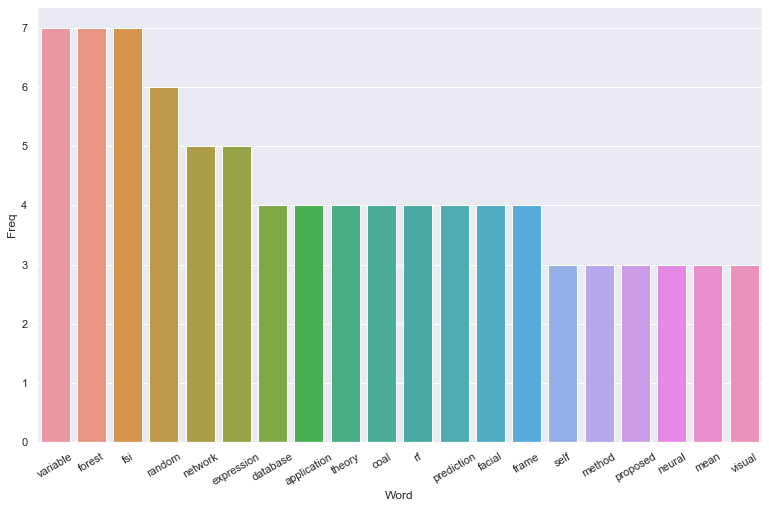

In [36]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram  Freq
0              random forest     6
1             neural network     3
2              visual cortex     3
3          self organization     2
4       associative database     2
5                  half part     2
6                 mean field     2
7               layer visual     2
8          artificial neural     2
9              free swelling     2
10            swelling index     2
11       variable importance     2
12    importance measurement     2
13          high dimensional     2
14            prediction fsi     2
15         facial expression     2
16  organization associative     1
17      database application     1
18     application efficient     1
19          efficient method     1


[Text(0, 0, 'random forest'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'visual cortex'),
 Text(0, 0, 'self organization'),
 Text(0, 0, 'associative database'),
 Text(0, 0, 'half part'),
 Text(0, 0, 'mean field'),
 Text(0, 0, 'layer visual'),
 Text(0, 0, 'artificial neural'),
 Text(0, 0, 'free swelling'),
 Text(0, 0, 'swelling index'),
 Text(0, 0, 'variable importance'),
 Text(0, 0, 'importance measurement'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'prediction fsi'),
 Text(0, 0, 'facial expression'),
 Text(0, 0, 'organization associative'),
 Text(0, 0, 'database application'),
 Text(0, 0, 'application efficient'),
 Text(0, 0, 'efficient method')]

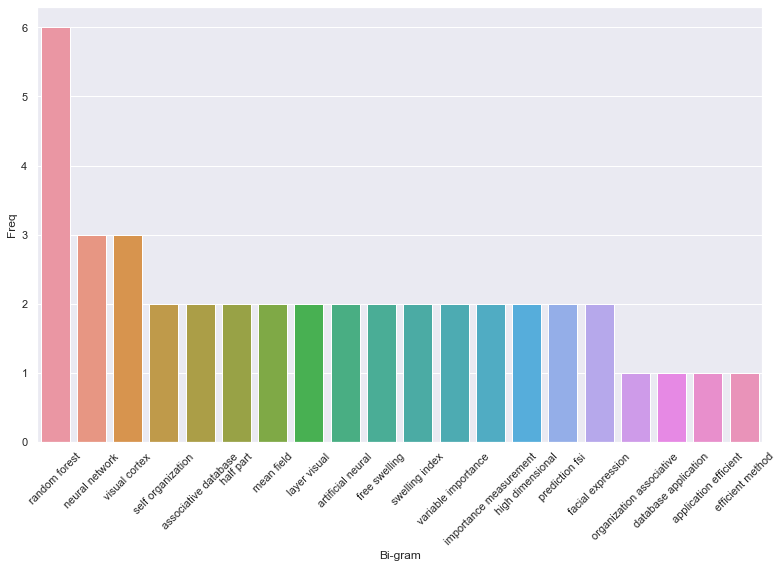

In [37]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                             Tri-gram  Freq
0                 layer visual cortex     2
1           artificial neural network     2
2                 free swelling index     2
3     variable importance measurement     2
4       self organization associative     1
5   organization associative database     1
6    associative database application     1
7      database application efficient     1
8        application efficient method     1
9               efficient method self     1
10             method self organizing     1
11        self organizing associative     1
12    organizing associative database     1
13      associative database proposed     1
14         database proposed together     1
15      proposed together application     1
16         together application robot     1
17         application robot eyesight     1
18              robot eyesight system     1
19           eyesight system proposed     1


[Text(0, 0, 'layer visual cortex'),
 Text(0, 0, 'artificial neural network'),
 Text(0, 0, 'free swelling index'),
 Text(0, 0, 'variable importance measurement'),
 Text(0, 0, 'self organization associative'),
 Text(0, 0, 'organization associative database'),
 Text(0, 0, 'associative database application'),
 Text(0, 0, 'database application efficient'),
 Text(0, 0, 'application efficient method'),
 Text(0, 0, 'efficient method self'),
 Text(0, 0, 'method self organizing'),
 Text(0, 0, 'self organizing associative'),
 Text(0, 0, 'organizing associative database'),
 Text(0, 0, 'associative database proposed'),
 Text(0, 0, 'database proposed together'),
 Text(0, 0, 'proposed together application'),
 Text(0, 0, 'together application robot'),
 Text(0, 0, 'application robot eyesight'),
 Text(0, 0, 'robot eyesight system'),
 Text(0, 0, 'eyesight system proposed')]

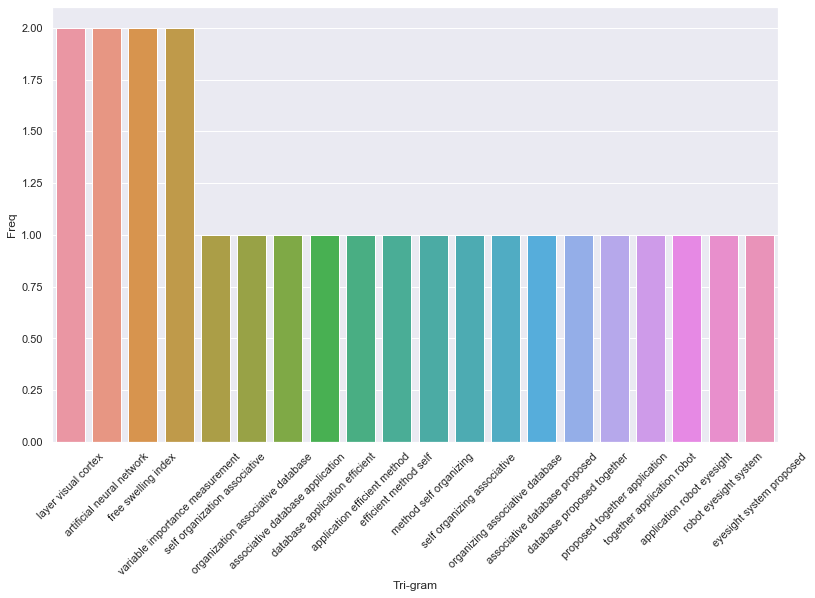

In [38]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [42]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
modeling free swelling index based variable importance measurement parent coal property random forest method coke quality critical role steelmaking industry aim study examine complex relationship various conventional coal analysis coke making index free swelling index fsi random forest rf associated variable importance measurement vim powerful statistical data mining approach utilized study analyze high dimensional database sample rank variable develop accurate fsi predictive model based important variable vim performed various type analysis indicated volatile matter carbon moisture coal rank parameter organic sulfur effective coal prop erties prediction fsi variable used input set rf model fsi modeling prediction result fsi model indicated rf provide satisfactory prediction fsi correlation determination r mean square error laboratory fsis smaller interval unit fsi based rf used rank select effective variable evaluating nonlinear relationship among parameter moreover employe